# Election Prediction Model-2024 

Data sourced from: https://myneta.info/ 



In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV

## The data for training from 2009-2019

In [3]:
# reading the data and cleaning the data, that is the input
data=pd.read_excel('election.xlsx')
data['Total Assets'] = data['Total Assets'].apply(lambda x:str(x).split('~')[0]).apply(lambda x:str(x).split('_')[0]).apply(lambda x:str(x).split('\n')[0])
data['Total Assets'] = data['Total Assets'].apply(lambda x:str(x).replace(',','')).apply(lambda x:str(x).replace('Rs','').strip())
data['Liabilities'] = data['Liabilities'].apply(lambda x:str(x).split('~')[0]).apply(lambda x:str(x).split('_')[0]).apply(lambda x:str(x).split('\n')[0])
data['Liabilities'] = data['Liabilities'].apply(lambda x:str(x).replace(',','')).apply(lambda x:str(x).replace('Rs','').strip())
data['Total Assets'] = data['Total Assets'].apply(lambda x:x.replace('Nil',str(np.nan)))
data['Liabilities'] = data['Liabilities'].apply(lambda x:x.replace('Nil',str(np.nan)))
data['Total Assets'] = data['Total Assets'].astype(float)
data['Liabilities'] = data['Liabilities'].astype(float)
data['Total Assets'] = data['Total Assets'].fillna(data['Total Assets'].mean())
data['Liabilities'] = data['Liabilities'].fillna(0)

In [4]:
data.head(5)

,Candidate,Constituency,Party,Criminal Cases,Education,Age,Total Assets,Liabilities,Year,Winner
0,Shashi TharoorWinner,Trivandrum,INC,1,Doctorate,53,212442472.0,0.0,2009,1
1,Adv Ramachandran Nair P,Trivandrum,CPI,0,Graduate Professional,57,2157292.0,638195.0,2009,0
2,Ajith Kumar K,Trivandrum,IND,0,12th Pass,41,60000.0,0.0,2009,0
3,Dileep,Trivandrum,IND,0,Graduate,28,40500.0,0.0,2009,0
4,G Ashokan,Trivandrum,IND,0,8th Pass,47,2000.0,0.0,2009,0


In [5]:
data.isnull().sum()

Candidate         0
Constituency      0
Party             0
Criminal Cases    0
Education         0
Age               0
Total Assets      0
Liabilities       0
Year              0
Winner            0
dtype: int64

## The data for 2024 prediction

In [5]:
# reading the data and cleaning the data, that is the for 2024 prediction
p_data = pd.read_excel('2024.xlsx')
p_data['Total Assets'] = p_data['Total Assets'].apply(lambda x:str(x).split('~')[0]).apply(lambda x:str(x).split('_')[0]).apply(lambda x:str(x).split('\n')[0])
p_data['Total Assets'] = p_data['Total Assets'].apply(lambda x:str(x).replace(',','')).apply(lambda x:str(x).replace('Rs','').strip())
p_data['Liabilities'] = p_data['Liabilities'].apply(lambda x:str(x).split('~')[0]).apply(lambda x:str(x).split('_')[0]).apply(lambda x:str(x).split('\n')[0])
p_data['Liabilities'] = p_data['Liabilities'].apply(lambda x:str(x).replace(',','')).apply(lambda x:str(x).replace('Rs','').strip())
p_data['Total Assets'] = p_data['Total Assets'].apply(lambda x:x.replace('Nil',str(np.nan)))
p_data['Liabilities'] = p_data['Liabilities'].apply(lambda x:x.replace('Nil',str(np.nan)))
p_data['Total Assets'] = p_data['Total Assets'].astype(float)
p_data['Liabilities'] = p_data['Liabilities'].astype(float)
p_data['Total Assets'] = p_data['Total Assets'].fillna(p_data['Total Assets'].mean())
p_data['Liabilities'] = p_data['Liabilities'].fillna(0)

In [6]:
p_data.head(5)

,Candidate,Constituency,Party,Criminal Cases,Education,Age,Total Assets,Liabilities,Year
0,A. M Ariff,Alappuzha,CPI(M),3,Graduate Professional,59,1.321630e+07,6095458.0,2024
1,Adv.K.M Shajahan,Alappuzha,IND,5,Post Graduate,62,1.899451e+07,4490000.0,2024
2,Arjunan,Alappuzha,SUCI(C),0,Others,60,3.646958e+06,160000.0,2024
3,Jayakrishnan P,Alappuzha,IND,0,12th Pass,49,9.105308e+06,483609.0,2024
4,Jyothi Abraham,Alappuzha,IND,0,10th Pass,43,2.346192e+07,0.0,2024


## Adding Coalation related Opinion Poll percentage

In [7]:
# Taking into consideration the coalition politics from 2009-2019
NDA = ['BJP', 'Bharath Dharma Jana Sena']
UDF = ['INC','Kerala Congress (M)','KC(M)','Indian Union Muslim League','Revolutionary Socialist Party','IUML']
LDF = ['CPI','CPI(M)','Marxist Communist Party of India e(United)',"JD(U)",'RJD','JD(S)','CPM',]

In [8]:
NDA_24= ['BJP', 'Bharath Dharma Jana Sena']
UDF_24 = ['INC',"Kerala Congress",'Indian Union Muslim League','Revolutionary Socialist Party','IUML']
LDF_24 = ['CPI','CPI(M)','Marxist Communist Party of India e(United)',"JD(U)",'RJD','JD(S)','CPM','Kerala Congress (M)']

In [9]:
#TRAIN DATA

data["Coalition"] =  data["Party"].apply(lambda x :"NDA" if x in NDA else ("UDF" if x in UDF else ("LDF" if x in LDF else "OTHERS")))
data.loc[data["Year"] == 2019, "Vote_Percent"] = data[data["Year"] == 2019]["Coalition"].apply(lambda x: 43 if x == "UDF" else (32 if x == "LDF" else (13 if x == "NDA" else 0)))
data.loc[data["Year"] == 2009, "Vote_Percent"] = data[data["Year"] == 2009]["Coalition"].apply(lambda x: 45 if x == "UDF" else (37.9 if x == "LDF" else (6.3 if x == "NDA" else 0)))
data.loc[data["Year"] == 2014, "Vote_Percent"] = data[data["Year"] == 2014]["Coalition"].apply(lambda x: 35 if x == "UDF" else (28 if x == "LDF" else (10.5 if x == "NDA" else 0)))


In [10]:
#TEST DATA

p_data["Coalition"] =  p_data["Party"].apply(lambda x :"NDA" if x in NDA_24 else ("UDF" if x in UDF_24 else ("LDF" if x in LDF_24 else "OTHERS")))
p_data.loc[p_data["Year"] == 2024, "Vote_Percent"] = p_data[p_data["Year"] == 2024]["Coalition"].apply(lambda x: 41.58 if x == "UDF" else (36.67 if x == "LDF" else (20.08 if x == "NDA" else 0)))
p_data

,Candidate,Constituency,Party,Criminal Cases,Education,Age,Total Assets,Liabilities,Year,Coalition,Vote_Percent
0,A. M Ariff,Alappuzha,CPI(M),3,Graduate Professional,59,1.321630e+07,6095458.0,2024,LDF,36.67
1,Adv.K.M Shajahan,Alappuzha,IND,5,Post Graduate,62,1.899451e+07,4490000.0,2024,OTHERS,0.00
2,Arjunan,Alappuzha,SUCI(C),0,Others,60,3.646958e+06,160000.0,2024,OTHERS,0.00
3,Jayakrishnan P,Alappuzha,IND,0,12th Pass,49,9.105308e+06,483609.0,2024,OTHERS,0.00
4,Jyothi Abraham,Alappuzha,IND,0,10th Pass,43,2.346192e+07,0.0,2024,OTHERS,0.00
...,...,...,...,...,...,...,...,...,...,...,...
183,Kodikunnil Suresh,Mavelikkara,INC,6,Graduate Professional,60,2.346192e+07,0.0,2024,UDF,41.58
184,Kozhuvasseril Suresh,Mavelikkara,IND,0,8th Pass,53,1.947354e+06,40000.0,2024,OTHERS,0.00
185,Manthara Velayudhan,Mavelikkara,IND,0,12th Pass,53,1.412000e+06,250000.0,2024,OTHERS,0.00
186,Santhosh Palathumpadan,Mavelikkara,BSP,0,10th Pass,47,3.574000e+06,350000.0,2024,OTHERS,0.00


In [11]:
# Removing Candidates from Data 
data = data.iloc[:,1:]
data.head(5)

,Constituency,Party,Criminal Cases,Education,Age,Total Assets,Liabilities,Year,Winner,Coalition,Vote_Percent
0,Trivandrum,INC,1,Doctorate,53,212442472.0,0.0,2009,1,UDF,45.0
1,Trivandrum,CPI,0,Graduate Professional,57,2157292.0,638195.0,2009,0,LDF,37.9
2,Trivandrum,IND,0,12th Pass,41,60000.0,0.0,2009,0,OTHERS,0.0
3,Trivandrum,IND,0,Graduate,28,40500.0,0.0,2009,0,OTHERS,0.0
4,Trivandrum,IND,0,8th Pass,47,2000.0,0.0,2009,0,OTHERS,0.0


In [12]:
#Removing candidates from P_data

p_data= p_data.iloc[:,1:]
p_data.head(5)

,Constituency,Party,Criminal Cases,Education,Age,Total Assets,Liabilities,Year,Coalition,Vote_Percent
0,Alappuzha,CPI(M),3,Graduate Professional,59,1.321630e+07,6095458.0,2024,LDF,36.67
1,Alappuzha,IND,5,Post Graduate,62,1.899451e+07,4490000.0,2024,OTHERS,0.00
2,Alappuzha,SUCI(C),0,Others,60,3.646958e+06,160000.0,2024,OTHERS,0.00
3,Alappuzha,IND,0,12th Pass,49,9.105308e+06,483609.0,2024,OTHERS,0.00
4,Alappuzha,IND,0,10th Pass,43,2.346192e+07,0.0,2024,OTHERS,0.00


In [13]:
# #To convert Education to Numeric Values
# party_list = data["Party"].unique().tolist()
# # party = {}
# # for i in range(0,len(party_list)):
# #     party[i+1] = party_list[i]
# # print(party)

# # party1 = {}
# # for i,j in enumerate(party_list):
# #     party1[i+1] = party_list[i]
# # party1
# party = {party_list[i]: i+1 for i,j in enumerate(party_list)}
# data  = data.replace(party)

# party_list1 = p_data["Party"].unique().tolist()
# party1 = {party_list1[i]: i+1  for i,j in enumerate(party_list1)}
# p_data = p_data.replace(party1)

In [14]:
# To Replace Parties in both data and p_data

In [15]:
party = {'CPI(M)': 1,
 'IND': 2,
 'SUCI(C)': 3,
 'INC': 4,
 'BSP': 5,
 'Bahujan Dravida Party': 6,
 'BJP': 7,
 'Twenty 20 Party': 8,
 'Bharath Dharma Jana Sena': 9,
 'Viduthalai Chiruthaigal Katchi': 10,
 'Bharatheeya Jawan Kisan Party': 11,
 'Ambedkarite Party of India': 12,
 'Revolutionary Socialist Party': 13,
 'Marxist Communist Party of India (United)': 14,
 'Kerala Congress': 15,
 'Samajwadi Jan Parishad': 16,
 'Kerala Congress (M)': 17,
 'Indian Union Muslim League': 18,
 'Peoples Party of India(secular)': 19,
 'CPI': 20,
 'New Labour Party': 21,
 'NCP': 22,
 'SHS': 23,
 'AAP': 24,
 'SDPI': 25,
 'Socialist Republican Party': 26,
 'RPI': 27,
 'RPI(A)': 28,
 'Pravasi Nivasi Party': 29,
 'RLD': 30,
 'CPM': 31,
 'AITC': 32,
 'Social Action Party': 33,
 'JD(U)': 34,
 'CPI(ML) Red star': 35,
 'Indian Gandhiyan Party': 36,
 'CPI(ML) Red Star': 35,
 'Socialist Janata (Democratic)': 38,
 'Welfare Party Of India': 39,
 'MUL': 40,
 'IUML': 18,
 'KEC': 15,
 'KEC(M)': 17,
 'Revolutionary Socialist Party of Kerala (B)': 44,
 'RJD': 45,
 'RSP': 13,
 'KC(M)': 17,
 'JD(S)': 48,
 'Welfare Party of India': 49,
 'Peoples Democratic Party': 50,
 'Samajwadi Forward Bloc': 51,
 'Rashtriya Samaj Paksha': 52,
 'Secular Democratic Congress': 53,
 'Agila India Makkal Kazhagam': 54,
 'National Labour Party': 55}

data  = data.replace(party)
p_data = p_data.replace(party)

In [16]:
Education = {'Graduate': 115,
 '12th Pass': 112,
 'Not Given': 100,
 '10th Pass': 104,
 'Others': 100,
 'Post Graduate': 117,
 'Graduate Professional': 118,
 '8th Pass': 108,
 'Doctorate': 120,
 'Literate': 105,
 '5th Pass': 105,
 'Illiterate': -1}
data = data.replace(Education)
p_data = p_data.replace(Education)

In [17]:
# p_data = p_data.replace(Education)

In [18]:
#To convert Constituency to Numeric Values
const_list = data["Constituency"].unique().tolist()
const = {const_list[i]: i+1001 for i,j in enumerate(const_list)}
data = data.replace(const)
p_data = p_data.replace(const)

In [19]:
pp = {'Thiruvananthapuram':1001}
p_data = p_data.replace(pp)

In [20]:
pp

{'Thiruvananthapuram': 1001}

In [21]:
# p_data = p_data.replace(const)

In [22]:
# const

In [23]:
# #To convert Candidate to Numeric Values
# can_list = data["Candidate"].unique().tolist()
# can = {can_list[i]: i+501 for i,j in enumerate(can_list)}
# data = data.replace(can)
# can

In [24]:
# can_list = p_data["Candidate"].unique().tolist()
# can = {can_list[i]: i+501 for i,j in enumerate(can_list)}
# p_data = p_data.replace(can)
# can

In [25]:
data.head(5)

,Constituency,Party,Criminal Cases,Education,Age,Total Assets,Liabilities,Year,Winner,Coalition,Vote_Percent
0,1001,4,1,120,53,212442472.0,0.0,2009,1,UDF,45.0
1,1001,20,0,118,57,2157292.0,638195.0,2009,0,LDF,37.9
2,1001,2,0,112,41,60000.0,0.0,2009,0,OTHERS,0.0
3,1001,2,0,115,28,40500.0,0.0,2009,0,OTHERS,0.0
4,1001,2,0,108,47,2000.0,0.0,2009,0,OTHERS,0.0


In [26]:
p_data.head(5)

,Constituency,Party,Criminal Cases,Education,Age,Total Assets,Liabilities,Year,Coalition,Vote_Percent
0,1022,1,3,118,59,1.321630e+07,6095458.0,2024,LDF,36.67
1,1022,2,5,117,62,1.899451e+07,4490000.0,2024,OTHERS,0.00
2,1022,3,0,100,60,3.646958e+06,160000.0,2024,OTHERS,0.00
3,1022,2,0,112,49,9.105308e+06,483609.0,2024,OTHERS,0.00
4,1022,2,0,104,43,2.346192e+07,0.0,2024,OTHERS,0.00


In [27]:
data= data.loc[:, ["Constituency","Party", "Criminal Cases", "Education", "Age", "Total Assets", "Liabilities", "Year","Winner","Vote_Percent"]]
data.head(5)

,Constituency,Party,Criminal Cases,Education,Age,Total Assets,Liabilities,Year,Winner,Vote_Percent
0,1001,4,1,120,53,212442472.0,0.0,2009,1,45.0
1,1001,20,0,118,57,2157292.0,638195.0,2009,0,37.9
2,1001,2,0,112,41,60000.0,0.0,2009,0,0.0
3,1001,2,0,115,28,40500.0,0.0,2009,0,0.0
4,1001,2,0,108,47,2000.0,0.0,2009,0,0.0


In [28]:
p_data= p_data.loc[:, ["Constituency","Party", "Criminal Cases", "Education", "Age", "Total Assets", "Liabilities", "Year","Vote_Percent"]]
p_data.head(5)

,Constituency,Party,Criminal Cases,Education,Age,Total Assets,Liabilities,Year,Vote_Percent
0,1022,1,3,118,59,1.321630e+07,6095458.0,2024,36.67
1,1022,2,5,117,62,1.899451e+07,4490000.0,2024,0.00
2,1022,3,0,100,60,3.646958e+06,160000.0,2024,0.00
3,1022,2,0,112,49,9.105308e+06,483609.0,2024,0.00
4,1022,2,0,104,43,2.346192e+07,0.0,2024,0.00


In [17]:
# X_test = data[data['Year'] == 2019]
# X_train = data[data['Year'] != 2019]

In [17]:
# y_test = X_test.iloc[:,-1]
# y_train = X_train.iloc[:,-1]

In [18]:
# X_test = X_test.iloc[:,:-1]
# X_train = X_train.iloc[:,:-1]

In [19]:
# X_train = pd.get_dummies(X_train).replace({False: 0, True: 1})
# X_test = pd.get_dummies(X_test).replace({False: 0, True: 1})

In [30]:
# y = data["Winner"]

In [327]:
# y = data["Winner"]
# x = data.drop(columns=["Winner"])
# x

## Using DecisionTree Classifier

In [20]:
# from sklearn.tree import DecisionTreeClassifier
# clf_dt = DecisionTreeClassifier().fit(X_train,y_train)

In [21]:
# clf_dt.score(X_train,y_train)

1.0

In [22]:
# clf_dt.score(X_test,y_test)

0.8983050847457628

In [23]:
# clf_dt.feature_importances_,X_train.columns

(array([0.14395269, 0.17423851, 0.41696626, 0.13939081, 0.        ,
        0.        , 0.        , 0.05575632, 0.06969541]),
 Index(['Candidate', 'Constituency', 'Party', 'Criminal Cases', 'Education',
        'Age', 'Total Assets', 'Liabilities', 'Year'],
       dtype='object'))

In [33]:
# from sklearn.model_selection import GridSearchCV
# grid_values = {'max_depth': [1,2,3,4,5,6,7,8,9,10],"min_samples_leaf" : [1,2,3,4,5,6,7,8,9,10]}

# clf = DecisionTreeClassifier(random_state = 0)

# grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = "roc_auc") #
# grid_clf_acc.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='roc_auc')

In [24]:
# import numpy
# import pandas as pd
# import seaborn as sn
# import matplotlib.pyplot as plt
# import matplotlib.cm as cm
# from matplotlib.colors import ListedColormap, BoundaryNorm
# from sklearn import neighbors
# import matplotlib.patches as mpatches
# import graphviz
# from sklearn.tree import export_graphviz
# import matplotlib.patches as mpatches
# def plot_decision_tree(clf, feature_names, class_names):
#     # This function requires the pydotplus module and assumes it's been installed.
#     # In some cases (typically under Windows) even after running conda install, there is a problem where the
#     # pydotplus module is not found when running from within the notebook environment.  The following code
#     # may help to guarantee the module is installed in the current notebook environment directory.
#     #
#     # import sys; sys.executable
#     # !{sys.executable} -m pip install pydotplus

#     export_graphviz(clf, out_file="adspy_temp.dot", feature_names=feature_names, class_names=class_names, filled = True, impurity = False)
#     with open("adspy_temp.dot") as f:
#         dot_graph = f.read()
#     # Alternate method using pydotplus, if installed.
#     # graph = pydotplus.graphviz.graph_from_dot_data(dot_graph)
#     # return graph.create_png()
#     return graphviz.Source(dot_graph)

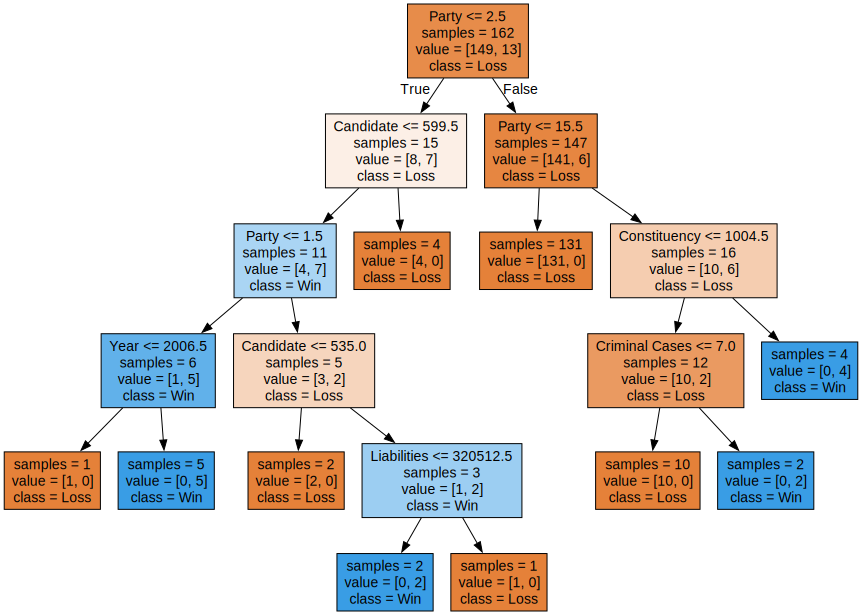

In [25]:
# plot_decision_tree(clf_dt, X_train.columns, ['Loss','Win'])

In [26]:
# w = clf_dt.predict(X_test)

In [27]:
# qq = {'pred':w,'actual':y_test,'names':X_test["Candidate"]}

## Using RandomFOrest

In [31]:
# from sklearn.ensemble import RandomForestClassifier 

In [80]:
# help(RandomForestClassifier)

In [83]:
# grid_values = {'n_estimators': [1,5,10,15,30],}
# #                "min_samples_leaf" : [20,30,40,50],
# #                "min_samples_split":[1,2,3,4]}

# clf2 = RandomForestClassifier(random_state = 0)

# grid_clf_acc = GridSearchCV(clf2, param_grid = grid_values,scoring = "roc_auc") 
# grid_clf_acc.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=0),
             param_grid={'n_estimators': [1, 5, 10, 15, 30]},
             scoring='roc_auc')

In [84]:
# w = grid_clf_acc.predict(X_test)
# names = X_test["Candidate"]
# d = {"predicted" : w,"actual" : y_test, "Names": names } #"actual" : y_test
# Final = pd.DataFrame(data = d)

In [79]:
# def map_candy(name):
#     for key, value in can.items():
#         if value == name:
#             return key
#     return None  # Return None if no match found

# # Apply the mapping function to create the "Candy" column in Final
# Final["Candy"] = Final["Names"].apply(map_candy)
# Final

In [86]:
# grid_clf_acc.score(X_test,y_test)

0.9103773584905661

# Using SVM

In [78]:
from sklearn.svm import SVC

In [75]:
# grid_values = {"gamma" : [0.001,0.01]}
# clf_s = SVC(kernel = 'linear')
# grid_clf_acc = GridSearchCV(clf_s, param_grid = grid_values,scoring = "roc_auc") 
# grid_clf_acc.fit(X_train,y_train)

In [76]:
# w = grid_clf_acc.predict(X_test)
# names = X_test["Candidate"]
# d = {"predicted" : w,"actual" : y_test, "Names": names } #"actual" : y_test
# Final = pd.DataFrame(data = d)

In [77]:
# def map_candy(name):
#     for key, value in can.items():
#         if value == name:
#             return key
#     return None  # Return None if no match found

# # Apply the mapping function to create the "Candy" column in Final
# Final["Candy"] = Final["Names"].apply(map_candy)
# Final

In [ ]:
# ! pip install pycaret

## Using Py Caret

In [1]:
from pycaret.classification import *
s = setup(data, target = 'Winner', session_id = 123)

NameError: name 'data' is not defined

In [47]:
# Using Object method
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()

In [48]:
type(exp)

pycaret.classification.oop.ClassificationExperiment

In [36]:
exp.setup(data, target = 'Winner', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Winner
2,Target type,Binary
3,Original data shape,"(697, 10)"
4,Transformed data shape,"(697, 10)"
5,Transformed train set shape,"(487, 10)"
6,Transformed test set shape,"(210, 10)"
7,Numeric features,9
8,Rows with missing values,1.7%
9,Preprocess,True


In [49]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9610,0.9427,0.6550,0.9217,0.7353,0.7162,0.7436,0.2230
et,Extra Trees Classifier,0.9590,0.9554,0.7000,0.8683,0.7432,0.7225,0.7433,0.2140
dt,Decision Tree Classifier,0.9528,0.8728,0.7750,0.7781,0.7576,0.7320,0.7427,0.0360
ridge,Ridge Classifier,0.9507,0.9270,0.7000,0.8050,0.7079,0.6830,0.7059,0.0370
ada,Ada Boost Classifier,0.9486,0.8908,0.6450,0.8117,0.6836,0.6577,0.6803,0.1270
xgboost,Extreme Gradient Boosting,0.9486,0.9362,0.6350,0.7683,0.6710,0.6447,0.6609,0.0290
lr,Logistic Regression,0.9466,0.9450,0.6800,0.7850,0.6839,0.6569,0.6821,0.0410
lightgbm,Light Gradient Boosting Machine,0.9466,0.9192,0.6200,0.7750,0.6623,0.6351,0.6539,0.4930
gbc,Gradient Boosting Classifier,0.9446,0.9325,0.6800,0.7217,0.6897,0.6595,0.6660,0.2150
lda,Linear Discriminant Analysis,0.9159,0.9270,0.8150,0.5456,0.6377,0.5941,0.6190,0.0390


In [55]:
exp.compare_models()

In [52]:
p_data.head(5)

,Constituency,Party,Criminal Cases,Education,Age,Total Assets,Liabilities,Year,Vote_Percent
0,1022,1,3,118,59,1.321630e+07,6095458.0,2024,36.67
1,1022,2,5,117,62,1.899451e+07,4490000.0,2024,0.00
2,1022,3,0,100,60,3.646958e+06,160000.0,2024,0.00
3,1022,2,0,112,49,9.105308e+06,483609.0,2024,0.00
4,1022,2,0,104,43,2.346192e+07,0.0,2024,0.00


In [53]:
# used to predict
pdf = predict_model(best,data = p_data)
pdf

,Constituency,Party,Criminal Cases,Education,Age,Total Assets,Liabilities,Year,Vote_Percent,prediction_label,prediction_score
0,1022,1,3,118,59,13216302.0,6095458.0,2024,36.669998,0,0.51
1,1022,2,5,117,62,18994512.0,4490000.0,2024,0.000000,0,0.73
2,1022,3,0,100,60,3646958.0,160000.0,2024,0.000000,0,0.94
3,1022,2,0,112,49,9105308.0,483609.0,2024,0.000000,0,0.94
4,1022,2,0,104,43,23461924.0,0.0,2024,0.000000,0,0.90
...,...,...,...,...,...,...,...,...,...,...,...
183,1018,4,6,118,60,23461924.0,0.0,2024,41.580002,1,0.88
184,1018,2,0,108,53,1947354.0,40000.0,2024,0.000000,0,0.95
185,1018,2,0,112,53,1412000.0,250000.0,2024,0.000000,0,0.95
186,1018,5,0,104,47,3574000.0,350000.0,2024,0.000000,0,0.92


In [56]:
def map_const(name):
    for key, value in const.items():
        if value == name:
            return key
    return None  # Return None if no match found

# Apply the mapping function to create the "Candy" column in Final
pdf["Constiuency Name"] = pdf["Constituency"].apply(map_const)

#________________________________________________________________________#

def map_party(name):
    for key, value in party.items():
        if value == name:
            return key
    return None  # Return None if no match found

# Apply the mapping function to create the "Candy" column in Final
pdf["Party Name"] = pdf["Party"].apply(map_party)

#________________________________________________________________________#

In [57]:
# to save prediction  as csv
pdf.to_csv("Results.csv")

In [58]:
pdf

,Constituency,Party,Criminal Cases,Education,Age,Total Assets,Liabilities,Year,Vote_Percent,prediction_label,prediction_score,Constiuency Name,Party Name
0,1022,1,3,118,59,13216302.0,6095458.0,2024,36.669998,0,0.51,Alappuzha,CPI(M)
1,1022,2,5,117,62,18994512.0,4490000.0,2024,0.000000,0,0.73,Alappuzha,IND
2,1022,3,0,100,60,3646958.0,160000.0,2024,0.000000,0,0.94,Alappuzha,SUCI(C)
3,1022,2,0,112,49,9105308.0,483609.0,2024,0.000000,0,0.94,Alappuzha,IND
4,1022,2,0,104,43,23461924.0,0.0,2024,0.000000,0,0.90,Alappuzha,IND
...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,1018,4,6,118,60,23461924.0,0.0,2024,41.580002,1,0.88,Mavelikkara,INC
184,1018,2,0,108,53,1947354.0,40000.0,2024,0.000000,0,0.95,Mavelikkara,IND
185,1018,2,0,112,53,1412000.0,250000.0,2024,0.000000,0,0.95,Mavelikkara,IND
186,1018,5,0,104,47,3574000.0,350000.0,2024,0.000000,0,0.92,Mavelikkara,BSP


In [59]:
# Add Coalition column
pdf["Coalition"] =  pdf["Party Name"].apply(lambda x :"NDA" if x in NDA_24 else ("UDF" if x in UDF_24 else ("LDF" if x in LDF_24 else "OTHERS")))

In [60]:
pdf

,Constituency,Party,Criminal Cases,Education,Age,Total Assets,Liabilities,Year,Vote_Percent,prediction_label,prediction_score,Constiuency Name,Party Name,Coalition
0,1022,1,3,118,59,13216302.0,6095458.0,2024,36.669998,0,0.51,Alappuzha,CPI(M),LDF
1,1022,2,5,117,62,18994512.0,4490000.0,2024,0.000000,0,0.73,Alappuzha,IND,OTHERS
2,1022,3,0,100,60,3646958.0,160000.0,2024,0.000000,0,0.94,Alappuzha,SUCI(C),OTHERS
3,1022,2,0,112,49,9105308.0,483609.0,2024,0.000000,0,0.94,Alappuzha,IND,OTHERS
4,1022,2,0,104,43,23461924.0,0.0,2024,0.000000,0,0.90,Alappuzha,IND,OTHERS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,1018,4,6,118,60,23461924.0,0.0,2024,41.580002,1,0.88,Mavelikkara,INC,UDF
184,1018,2,0,108,53,1947354.0,40000.0,2024,0.000000,0,0.95,Mavelikkara,IND,OTHERS
185,1018,2,0,112,53,1412000.0,250000.0,2024,0.000000,0,0.95,Mavelikkara,IND,OTHERS
186,1018,5,0,104,47,3574000.0,350000.0,2024,0.000000,0,0.92,Mavelikkara,BSP,OTHERS


In [61]:
# Get only winner data
pdf = pdf[pdf['prediction_label']==1]

In [62]:
pdf

,Constituency,Party,Criminal Cases,Education,Age,Total Assets,Liabilities,Year,Vote_Percent,prediction_label,prediction_score,Constiuency Name,Party Name,Coalition
5,1022,4,1,117,61,36342460.0,272817.0,2024,41.580002,1,0.72,Alappuzha,INC,UDF
13,1005,4,9,104,38,23461924.0,0.0,2024,41.580002,1,0.65,Alathur,INC,UDF
18,1008,1,1,118,58,23461924.0,0.0,2024,36.669998,1,0.55,Attingal,CPI(M),LDF
22,1009,4,5,115,71,35020208.0,7893411.0,2024,41.580002,1,0.85,Chalakudy,INC,UDF
26,1009,1,0,117,68,40306184.0,4482706.0,2024,36.669998,1,0.59,Chalakudy,CPI(M),LDF
34,1011,4,10,115,40,23461924.0,0.0,2024,41.580002,1,0.66,Ernakulam,INC,UDF
39,1012,4,88,117,42,20797764.0,3619970.0,2024,41.580002,1,0.80,Idukki,INC,UDF
51,1010,4,14,117,75,62979920.0,5933624.0,2024,41.580002,1,0.83,Kannur,INC,UDF
53,1010,1,9,118,63,14448542.0,0.0,2024,36.669998,1,0.61,Kannur,CPI(M),LDF
61,1013,1,0,104,74,27545988.0,0.0,2024,36.669998,1,0.60,Kasargod,CPI(M),LDF


In [63]:
# to select relevant column only
pdf = pdf.iloc[:,9:]

In [64]:
pdf

,prediction_label,prediction_score,Constiuency Name,Party Name,Coalition
5,1,0.72,Alappuzha,INC,UDF
13,1,0.65,Alathur,INC,UDF
18,1,0.55,Attingal,CPI(M),LDF
22,1,0.85,Chalakudy,INC,UDF
26,1,0.59,Chalakudy,CPI(M),LDF
34,1,0.66,Ernakulam,INC,UDF
39,1,0.80,Idukki,INC,UDF
51,1,0.83,Kannur,INC,UDF
53,1,0.61,Kannur,CPI(M),LDF
61,1,0.60,Kasargod,CPI(M),LDF


## To arrive a conclusion we manually gave  a metric

if same constituencies have multiple winners we create a column and give Contest status

it the prediction score is too near by we will conclude too close

and at the end we take one who has highest prediction score as winner

In [65]:
def filter_and_label(group):
    if len(group) == 1:
        group['Contest Type'] = 'Normal'
        return group
    else:
        sorted_group = group.sort_values(by='prediction_score', ascending=False)
        if sorted_group.iloc[0]['prediction_score'] - sorted_group.iloc[1]['prediction_score'] < 0.1:
            sorted_group['Contest Type'] = 'Too Close'
            return sorted_group
        if sorted_group.iloc[0]['prediction_score'] - sorted_group.iloc[1]['prediction_score'] < 0.2:
            sorted_group['Contest Type'] = 'Close'
            return sorted_group
        else:
            top_row = sorted_group.iloc[[0]]
            top_row['Contest Type'] = 'Normal'
            return top_row

# Apply the function to each group
result = pdf.groupby('Constiuency Name').apply(filter_and_label).reset_index(drop=True)

result

,prediction_label,prediction_score,Constiuency Name,Party Name,Coalition,Contest Type
0,1,0.72,Alappuzha,INC,UDF,Normal
1,1,0.65,Alathur,INC,UDF,Normal
2,1,0.55,Attingal,CPI(M),LDF,Normal
3,1,0.85,Chalakudy,INC,UDF,Normal
4,1,0.66,Ernakulam,INC,UDF,Normal
5,1,0.80,Idukki,INC,UDF,Normal
6,1,0.83,Kannur,INC,UDF,Normal
7,1,0.89,Kasargod,INC,UDF,Normal
8,1,0.84,Kollam,Revolutionary Socialist Party,UDF,Close
9,1,0.66,Kollam,CPI(M),LDF,Close


Renaming columns for making it meaningful

In [66]:
# below code we take the result and select only the one with best prediction score
f1_df = result.loc[result.groupby('Constiuency Name')['prediction_score'].idxmax()]
f1_df = f1_df.rename(columns={
    'prediction_label': 'Label',
    'prediction_score': 'Prediction Score',
    'Constiuency Name': 'Constituency Name',
    'Party Name': 'Winning Party Name',
    'Coalition': 'Winning Coalition Name',
    'Contest Type': 'Contest Type'
})
f1_df

,Label,Prediction Score,Constituency Name,Winning Party Name,Winning Coalition Name,Contest Type
0,1,0.72,Alappuzha,INC,UDF,Normal
1,1,0.65,Alathur,INC,UDF,Normal
2,1,0.55,Attingal,CPI(M),LDF,Normal
3,1,0.85,Chalakudy,INC,UDF,Normal
4,1,0.66,Ernakulam,INC,UDF,Normal
5,1,0.80,Idukki,INC,UDF,Normal
6,1,0.83,Kannur,INC,UDF,Normal
7,1,0.89,Kasargod,INC,UDF,Normal
8,1,0.84,Kollam,Revolutionary Socialist Party,UDF,Close
10,1,0.84,Kottayam,Kerala Congress,UDF,Too Close


In [67]:
# Remove Prediction Label-- this would be final result
f1_df = f1_df.iloc[:,1:]
f1_df

,Prediction Score,Constituency Name,Winning Party Name,Winning Coalition Name,Contest Type
0,0.72,Alappuzha,INC,UDF,Normal
1,0.65,Alathur,INC,UDF,Normal
2,0.55,Attingal,CPI(M),LDF,Normal
3,0.85,Chalakudy,INC,UDF,Normal
4,0.66,Ernakulam,INC,UDF,Normal
5,0.80,Idukki,INC,UDF,Normal
6,0.83,Kannur,INC,UDF,Normal
7,0.89,Kasargod,INC,UDF,Normal
8,0.84,Kollam,Revolutionary Socialist Party,UDF,Close
10,0.84,Kottayam,Kerala Congress,UDF,Too Close


## To Make Party List of all years to get correct id

In [104]:
pp = pd.read_excel('2024.xlsx',sheet_name='party')

In [105]:
pt = pp["Party"].unique().tolist()
part = {pt[i]: i+1  for i,j in enumerate(pt)}
part

{'CPI(M)': 1,
 'IND': 2,
 'SUCI(C)': 3,
 'INC': 4,
 'BSP': 5,
 'Bahujan Dravida Party': 6,
 'BJP': 7,
 'Twenty 20 Party': 8,
 'Bharath Dharma Jana Sena': 9,
 'Viduthalai Chiruthaigal Katchi': 10,
 'Bharatheeya Jawan Kisan Party': 11,
 'Ambedkarite Party of India': 12,
 'Revolutionary Socialist Party': 13,
 'Marxist Communist Party of India (United)': 14,
 'Kerala Congress': 15,
 'Samajwadi Jan Parishad': 16,
 'Kerala Congress (M)': 17,
 'Indian Union Muslim League': 18,
 'Peoples Party of India(secular)': 19,
 'CPI': 20,
 'New Labour Party': 21,
 'NCP': 22,
 'SHS': 23,
 'AAP': 24,
 'SDPI': 25,
 'Socialist Republican Party': 26,
 'RPI': 27,
 'RPI(A)': 28,
 'Pravasi Nivasi Party': 29,
 'RLD': 30,
 'CPM': 31,
 'AITC': 32,
 'Social Action Party': 33,
 'JD(U)': 34,
 'CPI(ML) Red star': 35,
 'Indian Gandhiyan Party': 36,
 'CPI(ML) Red Star': 37,
 'Socialist Janata (Democratic)': 38,
 'Welfare Party Of India': 39,
 'MUL': 40,
 'IUML': 41,
 'KEC': 42,
 'KEC(M)': 43,
 'Revolutionary Socialist P

### To manually correct codes

Sometimes BJP and Bharatiya Janatha Party will be there so we need single code for it

In [107]:
a=[10,20,30,50]
for i,j in enumerate(a):
    print(i,j)

0 10
1 20
2 30
3 50


In [73]:
# # Un comment and Use
# party = {'CPI(M)': 1,
#  'IND': 2,
#  'SUCI(C)': 3,
#  'INC': 4,
#  'BSP': 5,
#  'Bahujan Dravida Party': 6,
#  'BJP': 7,
#  'Twenty 20 Party': 8,
#  'Bharath Dharma Jana Sena': 9,
#  'Viduthalai Chiruthaigal Katchi': 10,
#  'Bharatheeya Jawan Kisan Party': 11,
#  'Ambedkarite Party of India': 12,
#  'Revolutionary Socialist Party': 13,
#  'Marxist Communist Party of India (United)': 14,
#  'Kerala Congress': 15,
#  'Samajwadi Jan Parishad': 16,
#  'Kerala Congress (M)': 17,
#  'Indian Union Muslim League': 18,
#  'Peoples Party of India(secular)': 19,
#  'CPI': 20,
#  'New Labour Party': 21,
#  'NCP': 22,
#  'SHS': 23,
#  'AAP': 24,
#  'SDPI': 25,
#  'Socialist Republican Party': 26,
#  'RPI': 27,
#  'RPI(A)': 28,
#  'Pravasi Nivasi Party': 29,
#  'RLD': 30,
#  'CPM': 31,
#  'AITC': 32,
#  'Social Action Party': 33,
#  'JD(U)': 34,
#  'CPI(ML) Red star': 35,
#  'Indian Gandhiyan Party': 36,
#  'CPI(ML) Red Star': 35,
#  'Socialist Janata (Democratic)': 38,
#  'Welfare Party Of India': 39,
#  'MUL': 40,
#  'IUML': 18,
#  'KEC': 15,
#  'KEC(M)': 17,
#  'Revolutionary Socialist Party of Kerala (B)': 44,
#  'RJD': 45,
#  'RSP': 13,
#  'KC(M)': 17,
#  'JD(S)': 48,
#  'Welfare Party of India': 49,
#  'Peoples Democratic Party': 50,
#  'Samajwadi Forward Bloc': 51,
#  'Rashtriya Samaj Paksha': 52,
#  'Secular Democratic Congress': 53,
#  'Agila India Makkal Kazhagam': 54,
#  'National Labour Party': 55}

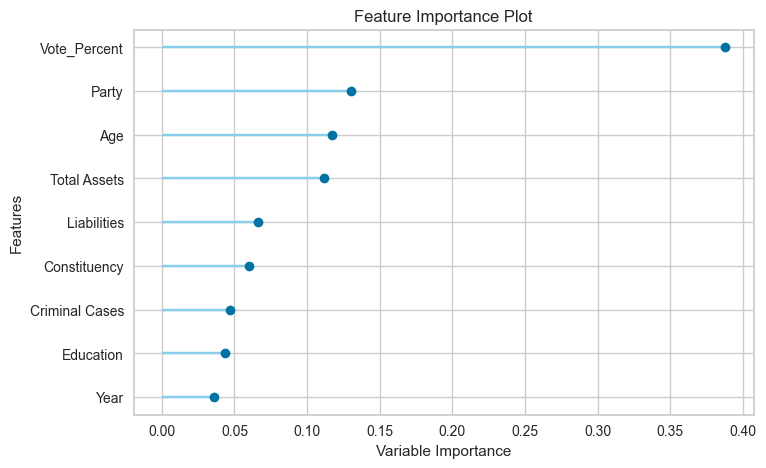

In [59]:
plot_model(best, plot = 'feature')

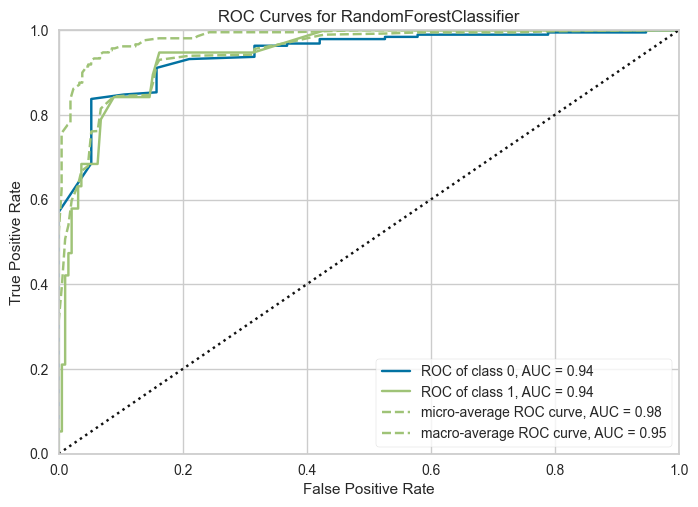

In [60]:
plot_model(best, plot = 'auc')

In [61]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [62]:
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9333,0.9436,0.4737,0.6923,0.5625,0.5278,0.5389


In [72]:
# save pipeline model will be saved in a pickle file
save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Constituency', 'Party',
                                              'Criminal Cases', 'Education',
                                              'Age', 'Total Assets',
                                              'Liabilities', 'Year',
                                              'Vote_Percent'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean')))...
                  RandomF

In [64]:
# load pipeline
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\GSREEJ~1\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Constituency', 'Party',
                                             'Criminal Cases', 'Education',
                                             'Age', 'Total Assets',
                                             'Liabilities', 'Year',
                                             'Vote_Percent'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        monotonic_cst=None, n_estimators=100,
                                        n_jobs=-1, oob_score=False,
                                        random_state=123, verbose=0,
                                        warm_start=False))],
         verbose=False)

In [71]:
# check available models
# we can use id to create model's with that model
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [70]:
create_model('xgboost', fold=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9325,0.9378,0.6000,0.6429,0.6207,0.5837,0.5841
1,0.9074,0.8953,0.5714,0.4706,0.5161,0.4655,0.4681
2,0.9630,0.9692,0.6667,0.9091,0.7692,0.7496,0.7603
Mean,0.9343,0.9341,0.6127,0.6742,0.6353,0.5996,0.6042
Std,0.0227,0.0303,0.0399,0.1804,0.1038,0.1165,0.1201


XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, objective='binary:logistic', ...)

### Using DNN

In [59]:
y = data["Winner"]
x = data.drop(columns=["Winner"]) # another method data.loc[:, data.columns != 'winner']
x

,Constituency,Party,Criminal Cases,Education,Age,Total Assets,Liabilities,Year,Vote_Percent
0,1001,4,1,120,53,2.124425e+08,0.0,2009,45.0
1,1001,20,0,118,57,2.157292e+06,638195.0,2009,37.9
2,1001,2,0,112,41,6.000000e+04,0.0,2009,0.0
3,1001,2,0,115,28,4.050000e+04,0.0,2009,0.0
4,1001,2,0,108,47,2.000000e+03,0.0,2009,0.0
...,...,...,...,...,...,...,...,...,...
692,1016,2,0,105,45,9.649377e+06,0.0,2019,0.0
693,1016,2,0,104,47,7.060000e+05,0.0,2019,0.0
694,1016,2,0,112,53,9.625000e+06,3607000.0,2019,0.0
695,1016,5,0,115,62,5.570000e+06,1000000.0,2019,0.0


In [229]:
X_test = data[data['Year'] == 2019].drop(columns=["Winner"])
X_train = data[data['Year'] != 2019].drop(columns=["Winner"])

In [231]:
y_test = data[data['Year'] == 2019]["Winner"]
y_train = data[data['Year'] != 2019]["Winner"]

In [248]:
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import *
from keras import optimizers
import keras

#### Now we will create layers our hidden layers

In [279]:
model = Sequential()

In [280]:
X_train.shape[1:]

(9,)

In [281]:
model.add(Input(X_train.shape[1:]))

In [282]:
model.add(Dense(50,activation = 'relu',name = 'First'))

In [283]:
model.add(Dense(50,activation = 'relu',name = 'Second'))

In [284]:
model.add(Dense(30,activation = 'relu',name = 'Third'))

In [285]:
model.add(Dense(10,activation = 'relu',name = 'Fourth'))

In [286]:
model.add(Dense(1,activation = 'sigmoid',name = 'output'))

In [287]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ First (Dense)                        │ (None, 50)                  │             500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Second (Dense)                       │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Third (Dense)                        │ (None, 30)                  │           1,530 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Fourth (Dense)                       │ (None, 10)                  │             310 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,901 (19.14 KB)

 Trainable params: 4,901 (19.14 KB)

 Non-trainable params: 0 (0.00 B)

#### Now we will compile our model

In [288]:
sgd = optimizers.SGD(learning_rate =0.001,momentum = 0.1)

In [289]:
# adam = optimizers.Adam(learning_rate=0.001)

metrics = ['accuracy']

metrics =[keras.metrics.BinaryAccuracy()]

metrics = ['f1_score']

In [290]:
# m = keras.metrics.AUC(from_logits=True)

In [296]:
model.compile(optimizer = 'adam',loss ='binary_crossentropy',metrics =['f1_score'] )

In [297]:
model.fit(X_train,y_train,epochs=250,validation_split=0.3,verbose=1)

Epoch 1/250
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - f1_score: 0.1714 - loss: 0.4273 - val_f1_score: 0.1656 - val_loss: 0.4225
Epoch 2/250
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - f1_score: 0.1817 - loss: 0.4308 - val_f1_score: 0.1656 - val_loss: 0.4204
Epoch 3/250
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - f1_score: 0.1303 - loss: 0.4015 - val_f1_score: 0.1656 - val_loss: 0.4183
Epoch 4/250
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - f1_score: 0.1649 - loss: 0.4174 - val_f1_score: 0.1656 - val_loss: 0.4162
Epoch 5/250
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - f1_score: 0.1193 - loss: 0.3913 - val_f1_score: 0.1656 - val_loss: 0.4142
Epoch 6/250
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - f1_score: 0.1700 - loss: 0.4163 - val_f1_score: 0.1656 - val_loss: 0.4123
Epoch 7/250
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - f1_score: 0.1622 - loss: 0.4099 - val_f1_score: 0.1656 - val_loss: 0.4104
Epoch 8/250
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - f1_score: 0.1632 - loss: 0.4089 - val_f1_score: 0.1656 - 

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - f1_score: 0.1345 - loss: 0.2917 - val_f1_score: 0.1656 - val_loss: 0.3213
Epoch 102/250
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - f1_score: 0.1638 - loss: 0.3195 - val_f1_score: 0.1656 - val_loss: 0.3209
Epoch 103/250
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - f1_score: 0.1517 - loss: 0.3070 - val_f1_score: 0.1656 - val_loss: 0.3206
Epoch 104/250
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - f1_score: 0.1879 - loss: 0.3437 - val_f1_score: 0.1656 - val_loss: 0.3203
Epoch 105/250
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - f1_score: 0.1589 - loss: 0.3147 - val_f1_score: 0.1656 - val_loss: 0.3199
Epoch 106/250
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - f1_score: 0.1828 - loss: 0.3381 - val_f1_score: 0.1656 - val_loss: 0.3196
Epoch 107/250
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - f1_score: 0.1614 - loss: 0.3155 - val_f1_score: 0.1656 - val_loss: 0.3192
Epoch 108/250
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - f1_score: 0.1184 - loss: 0.2728 - val_f1_score: 0.1656 -

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - f1_score: 0.1960 - loss: 0.3443 - val_f1_score: 0.1656 - val_loss: 0.3050
Epoch 202/250
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - f1_score: 0.2029 - loss: 0.3541 - val_f1_score: 0.1656 - val_loss: 0.3050
Epoch 203/250
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - f1_score: 0.1512 - loss: 0.2874 - val_f1_score: 0.1656 - val_loss: 0.3049
Epoch 204/250
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - f1_score: 0.1590 - loss: 0.2968 - val_f1_score: 0.1656 - val_loss: 0.3049
Epoch 205/250
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - f1_score: 0.1480 - loss: 0.2832 - val_f1_score: 0.1656 - val_loss: 0.3048
Epoch 206/250
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - f1_score: 0.1699 - loss: 0.3105 - val_f1_score: 0.1656 - val_loss: 0.3048
Epoch 207/250
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - f1_score: 0.1472 - loss: 0.2825 - val_f1_score: 0.1656 - val_loss: 0.3047
Epoch 208/250
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - f1_score: 0.1361 - loss: 0.2687 - val_f1_score: 0.1656 -

In [298]:
model.evaluate(X_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - f1_score: 0.1684 - loss: 0.3076 


[0.306874543428421, 0.16806720197200775]

In [299]:
model.predict(p_data)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


array([[0.09924661],
       [0.09924661],
       [0.09924661],
       [0.09924661],
       [0.09924661],
       [0.09924661],
       [0.09924661],
       [0.09924661],
       [0.09924661],
       [0.09924661],
       [0.09924661],
       [0.09924661],
       [0.09924661],
       [0.09924661],
       [0.09924661],
       [0.09924661],
       [0.09924661],
       [0.09924661],
       [0.09924661],
       [0.09924661],
       [0.09924661],
       [0.09924661],
       [0.09924661],
       [0.09924661],
       [0.09924661],
       [0.09924661],
       [0.09924661],
       [0.09924661],
       [0.09924661],
       [0.09924661],
       [0.09924661],
       [0.09924661],
       [0.09924661],
       [0.09924661],
       [0.09924661],
       [0.09924661],
       [0.09924661],
       [0.09924661],
       [0.09924661],
       [0.09924661],
       [0.09924661],
       [0.09924661],
       [0.09924661],
       [0.09924661],
       [0.09924661],
       [0.09924661],
       [0.09924661],
       [0.099